In [1]:
import numpy as np
import pandas as pd


In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

In [3]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status','occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week','native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [6]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
train_set.shape

(32561, 15)

In [8]:
test_set.shape

(16281, 15)

In [9]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [11]:
#exploratory data analysis to find important factors to predict the target variable

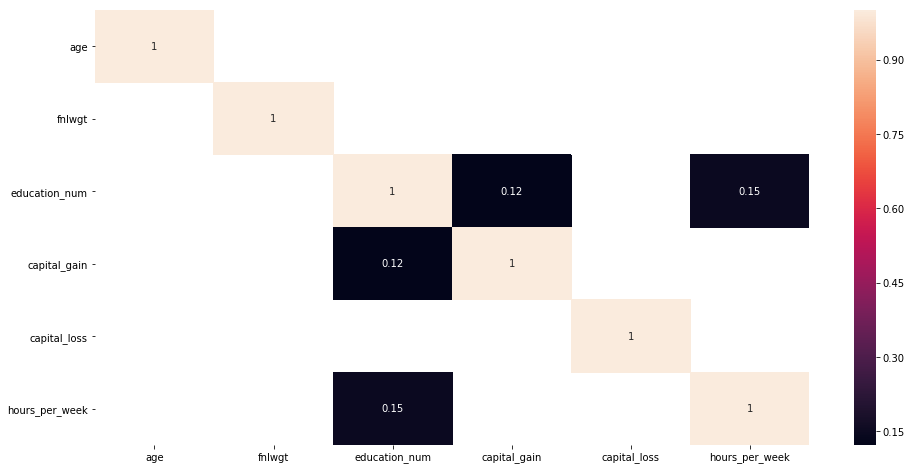

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(16,8))
sns.heatmap(train_set.corr()[train_set.corr().abs()>0.1],annot=True)

In [14]:
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier

#from sklearn.datasets import load_svmlight_files

In [ ]:
#one hot encoding

In [15]:
train_set['wage_class'], _ = pd.factorize(train_set['wage_class'])

In [16]:
y_train = train_set["wage_class"]

In [17]:
train_set = train_set.drop(["wage_class"] , axis =1)

In [18]:
train_set['education'], _ = pd.factorize(train_set['education'])
train_set['marital_status'],_ = pd.factorize(train_set['marital_status'])

train_set['occupation'],_ = pd.factorize(train_set['occupation'])

train_set['relationship'],_ = pd.factorize(train_set['relationship'])

train_set['race'],_ = pd.factorize(train_set['race'])

train_set['sex'],_ = pd.factorize(train_set['sex'])

train_set['native_country'],_ = pd.factorize(train_set['native_country'])



In [19]:
train_set['workclass'],_ = pd.factorize(train_set['workclass'])

In [20]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1


In [21]:
test_set['education'], _ = pd.factorize(test_set['education'])
test_set['marital_status'],_ = pd.factorize(test_set['marital_status'])

test_set['occupation'],_ = pd.factorize(test_set['occupation'])

test_set['relationship'],_ = pd.factorize(test_set['relationship'])

test_set['race'],_ = pd.factorize(test_set['race'])

test_set['sex'],_ = pd.factorize(test_set['sex'])

test_set['native_country'],_ = pd.factorize(test_set['native_country'])

test_set['workclass'],_ = pd.factorize(test_set['workclass'])

In [22]:
X_train = train_set

In [23]:
test_set['wage_class'], _ = pd.factorize(test_set['wage_class'])

In [24]:
y_test = test_set["wage_class"]


In [25]:
X_test = test_set.drop(["wage_class"] ,axis =1) 

In [26]:
params = {
    'objective': 'binary:logistic',                 #training parameters
    'max_depth': 2,
    'learning_rate': 1.0,
    'silent': 1,
    'n_estimators': 5
}

In [27]:
bst = XGBClassifier(**params).fit(X_train, y_train)     # training classifier

In [28]:
preds = bst.predict(X_test)
preds                                    #make predictions

C:\Users\thanusha\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [29]:
correct = 0

for i in range(len(preds)):
    if (y_test[i] == preds[i]):
        correct += 1
        
acc = accuracy_score(y_test, preds)

print('Predicted correctly: {0}/{1}'.format(correct, len(preds)))
print('Error: {0:.4f}'.format(1-acc))

Predicted correctly: 13686/16281
Error: 0.1594


In [30]:
acc

0.8406117560346416

In [31]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator= bst,     # Model to test
                X= X_train,  
                y = y_train,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

C:\Users\thanusha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\thanusha\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\thanusha\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Us

Accuracy per fold: 
[0.8455634  0.84858722 0.85165848 0.84398034 0.85135135 0.8519656
 0.84981572 0.85841523 0.84981572 0.8507371 ]
Average accuracy:  0.8501890183230374


In [32]:
#accuracy of 84% using xgboost

In [33]:
#using random forest classifier

In [34]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


C:\Users\thanusha\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [35]:
classifier = RandomForestClassifier(n_estimators=10,random_state=0)  
classifier.fit(X_train, y_train)  
targets_pred = classifier.predict(X_test)                                 #taking 10 estimators
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, targets_pred))

0.671394276760214


In [36]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, targets_pred)
print('Accuracy: {:.2f}'.format(accuracy))  # measure the accuracy

Accuracy: 0.82


In [37]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator= classifier,     # Model to test
                X= X_train,  
                y = y_train,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[0.8366595  0.85135135 0.85257985 0.84336609 0.84735872 0.8519656
 0.8531941  0.86025799 0.85595823 0.85165848]
Average accuracy:  0.8504349920300183


In [38]:
#using a decision tree
# train the decision tree
from sklearn import tree, model_selection
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [39]:
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))  # measure the accuracy

Accuracy: 0.83


In [40]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.85      0.95      0.90     12435
          1       0.73      0.45      0.55      3846

avg / total       0.82      0.83      0.81     16281



In [41]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator= dtree,     # Model to test
                X= X_train,  
                y = y_train,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[0.81823764 0.82432432 0.80128993 0.81695332 0.82954545 0.82923833
 0.79914005 0.83691646 0.83261671 0.82585995]
Average accuracy:  0.8214122162886364
